<a href="https://colab.research.google.com/github/DustyAlex/BreastCancerDetect/blob/main/Breast_Cancer_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary libraries.**

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import sklearn.datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## ***Getting the breast cancer dataset from sklearn.***

In [ ]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
#printing the dataset which is inn numpy format.

print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
#Converting it to pandas dataframe and storing it in 'df'.

df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

# **Getting information about the dataset.**

In [ ]:
#Displaying the first five rows of the dataframe.

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Adding the target column as label.

df['label'] = breast_cancer_dataset.target

In [ ]:
#Displayig the last five rows of the dataset.

df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
#We find the number of rows and columns in the dataset, there are 569 rows and 31 columns or features.

df.shape

(569, 31)

In [ ]:
#Describinng the dataset.

df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
#Finding the information of the dataset like datatypes and number of entries.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# **Checking for missing values.**

In [ ]:
#Finding out if there is any null value
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

# **1 --> Benign**

# **0 --> Malignant**

In [ ]:
df['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

# ***Splitting the dataset***

In [ ]:
#X contains every feature accept the testing feature or the 'label' column.
#Y contains only the test feature or the 'target' column.

X = df.drop(columns ='label', axis=1)
Y = df['label']

In [ ]:
#Finding the mean value of each feature in respect whether it is malignant or benign.

df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

# **Logistic Regression.**

In [ ]:
#Train-test splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (455, 30) (114, 30)


In [ ]:
#Fitting the dataset into Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_train_prediction = model.predict(X_train)
Y_test_prediction = model.predict(X_test)
training_data_accuracy = accuracy_score(Y_train, Y_train_prediction)
test_data_accuracy = accuracy_score(Y_test, Y_test_prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Finding the acccuracy on test data or unknown data.
print('Accuracy on training data = ', training_data_accuracy*100, "%")
#Finding the acccuracy on training data or known data.
print('Accuracy on test data = ', test_data_accuracy*100, "%")

Accuracy on training data =  94.72527472527472 %
Accuracy on test data =  92.98245614035088 %


In [ ]:
#Giving a new data to predict whether it is malugnant or benign

input_data = (13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,0.05871,0.4565,1.29,2.861,43.14,0.005872,0.01488,0.02647,0.009921,0.01465,0.002355,16.99,35.27,108.6,906.5,0.1265,0.1943,0.3169,0.1184,0.2651,0.07397)
input_data_as_numpy = np.asarray(input_data)
reshaped_input_data = input_data_as_numpy.reshape(1, -1)

prediction = model.predict(reshaped_input_data)


if(prediction[0]==0):
    print("Malignant")
elif (prediction[0]==1):
    print("Benign")
else:
  print("error!!")

Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **Random Forest Classifier**

In [ ]:
#Fitting the dataset into Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)
Y_train_prediction = model.predict(X_train)
Y_test_prediction = model.predict(X_test)
training_data_accuracy = accuracy_score(Y_train, Y_train_prediction)
test_data_accuracy = accuracy_score(Y_test, Y_test_prediction)


In [ ]:
#Finding the acccuracy on training data or known data.
print("Accuracy on training data = ",training_data_accuracy*100, "%")
#Finding the acccuracy on test data or unknown data.
print("Accuracy on test data = ",test_data_accuracy*100, "%")

Accuracy on training data =  100.0 %
Accuracy on test data =  94.73684210526315 %


# **K-Nearest Neighbors**

In [ ]:
#Fitting the dataset into K-Nearest Neighbours
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, Y_train)
y_predtrain1 = knn1.predict(X_train)
y_pred1 = knn1.predict(X_test)

In [ ]:
#Finding the acccuracy on training data or known data.
print(f'Accuracy on training data = {accuracy_score(y_predtrain1,Y_train)*100}%')
#Finding the acccuracy on test data or unknown data.
print(f'Accuracy on test data = {accuracy_score(y_pred1,Y_test)*100}%')

Accuracy on training data = 95.82417582417582%
Accuracy on test data = 90.35087719298247%


# **Decision Tree Classifier**

In [ ]:
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train, Y_train)
Y_train_prediction = Dtree.predict(X_train)
Y_test_prediction = Dtree.predict(X_test)
training_data_accuracy = accuracy_score(Y_train, Y_train_prediction)
test_data_accuracy = accuracy_score(Y_test, Y_test_prediction)

In [ ]:
#Finding the acccuracy on training data or known data.
print(f'Accuracy on training data = {accuracy_score(Y_train_prediction,Y_train)*100}%')
#Finding the acccuracy on test data or unknown data.
print(f'Accuracy on test data = {accuracy_score(Y_test_prediction,Y_test)*100}%')

Accuracy on training data = 100.0%
Accuracy on test data = 92.10526315789474%


# ***Finding feature priority and feature dependence using differnt methods.***

In [ ]:
#Finding priority of each feature out of 100%.

feature_priority=(model.feature_importances_)*100
print(feature_priority)

[ 4.57346853  1.62610575  6.30840581  7.05885546  0.59341679  1.17481487
  4.96477935 11.4391239   0.18697651  0.28892704  0.71317867  0.53699464
  1.20227798  2.52093216  0.27306566  0.44546083  0.31033698  0.28669028
  0.16410417  0.43892653  7.20157356  1.67123652 13.42588136 14.9098354
  1.20503443  1.13479578  3.41008594 10.31744056  1.04764735  0.56962719]


(0.0, 100.0)

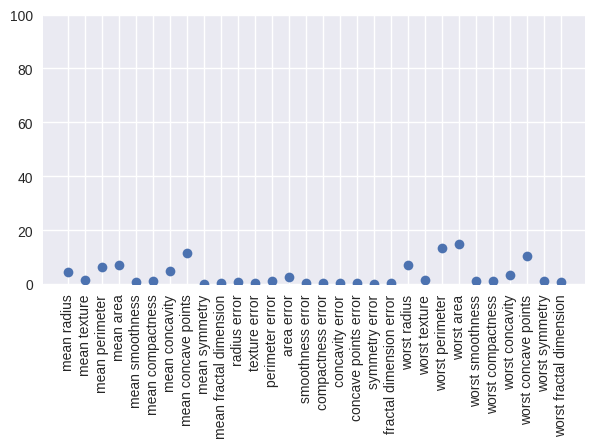

In [ ]:
#Plotting the feature priority.

plt.figure(figsize=(7,3.5))
plt.plot(feature_priority, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.ylim(0, 100)

In [ ]:
#Finding feature co-relation using spearman method.  

df.corr(method="spearman")

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
mean radius,1.000000,0.340956,0.997802,0.999602,0.148510,0.497578,0.645728,0.759702,0.120242,-0.349931,...,0.314911,0.971555,0.978863,0.125789,0.491357,0.596043,0.727265,0.174698,0.044564,-0.732785
mean texture,0.340956,1.000000,0.348142,0.344145,0.024649,0.266499,0.342646,0.306891,0.110130,-0.059303,...,0.909218,0.375273,0.368335,0.101401,0.290917,0.339725,0.319235,0.120693,0.116144,-0.461971
mean perimeter,0.997802,0.348142,1.000000,0.997068,0.182923,0.543925,0.681958,0.788629,0.150049,-0.304891,...,0.323109,0.978980,0.980864,0.156611,0.534565,0.632106,0.757526,0.199007,0.088961,-0.748496
mean area,0.999602,0.344145,0.997068,1.000000,0.138053,0.488988,0.642557,0.755165,0.113928,-0.358425,...,0.318178,0.971822,0.980264,0.119712,0.485813,0.593736,0.723390,0.170860,0.038758,-0.734122
mean smoothness,0.148510,0.024649,0.182923,0.138053,1.000000,0.678806,0.518511,0.565172,0.542228,0.588465,...,0.060645,0.226345,0.191735,0.796085,0.481384,0.429107,0.498868,0.393579,0.511457,-0.371892
mean compactness,0.497578,0.266499,0.543925,0.488988,0.678806,1.000000,0.896518,0.848295,0.552203,0.499195,...,0.255305,0.592254,0.531590,0.578902,0.901029,0.837921,0.825473,0.450333,0.688986,-0.609288
mean concavity,0.645728,0.342646,0.681958,0.642557,0.518511,0.896518,1.000000,0.927352,0.446793,0.258174,...,0.335866,0.722424,0.676628,0.488775,0.849985,0.938543,0.904938,0.383667,0.541838,-0.733308
mean concave points,0.759702,0.306891,0.788629,0.755165,0.565172,0.848295,0.927352,1.000000,0.423767,0.142659,...,0.300562,0.813960,0.780395,0.490035,0.758309,0.827281,0.937075,0.355477,0.421110,-0.777877
mean symmetry,0.120242,0.110130,0.150049,0.113928,0.542228,0.552203,0.446793,0.423767,1.000000,0.428467,...,0.118890,0.190526,0.154462,0.424230,0.440828,0.394481,0.397477,0.710359,0.410069,-0.332567
mean fractal dimension,-0.349931,-0.059303,-0.304891,-0.358425,0.588465,0.499195,0.258174,0.142659,0.428467,1.000000,...,-0.047791,-0.247456,-0.304927,0.493474,0.403653,0.242611,0.139152,0.295046,0.760771,0.025903


In [ ]:
#Finding feature co-relation using pearson method. 

df.corr(method="pearson")

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<Axes: >

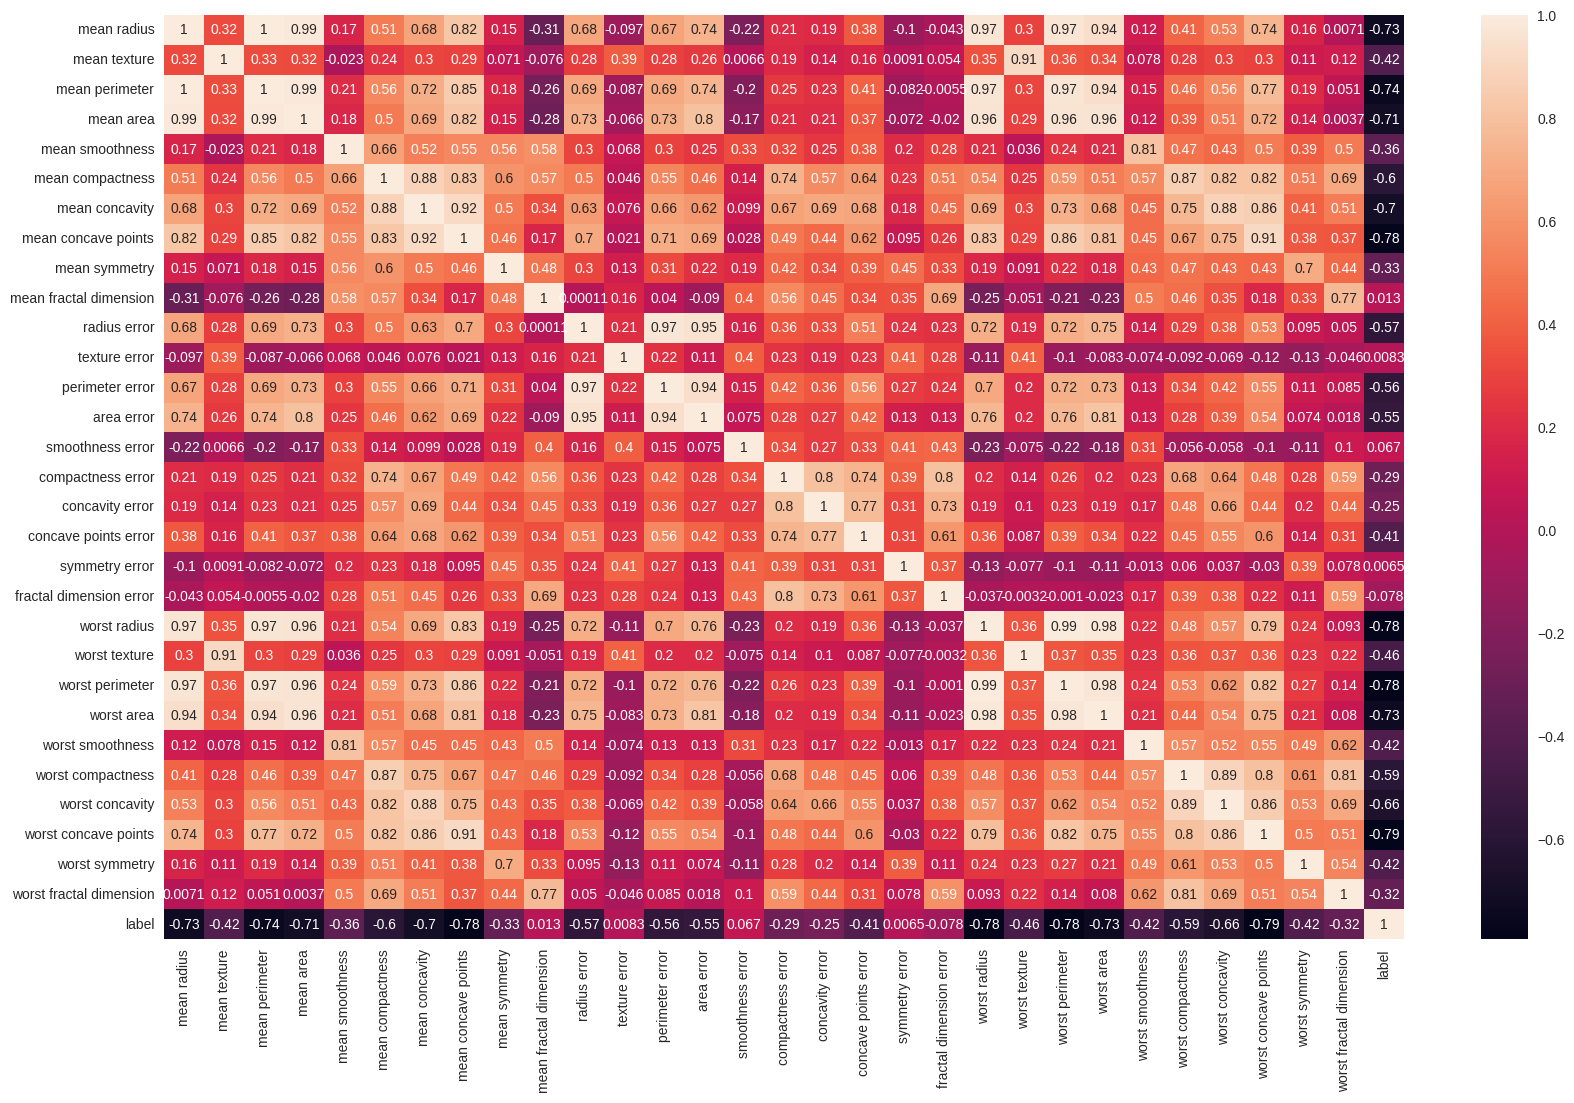

In [ ]:
#Plotting co-relation in a heat map where dark color means less related and light color is more related.

cor=df.corr(method="pearson")
plt.figure(figsize=(20,12))
sns.heatmap(cor, annot = True)

# ***Feature selection***

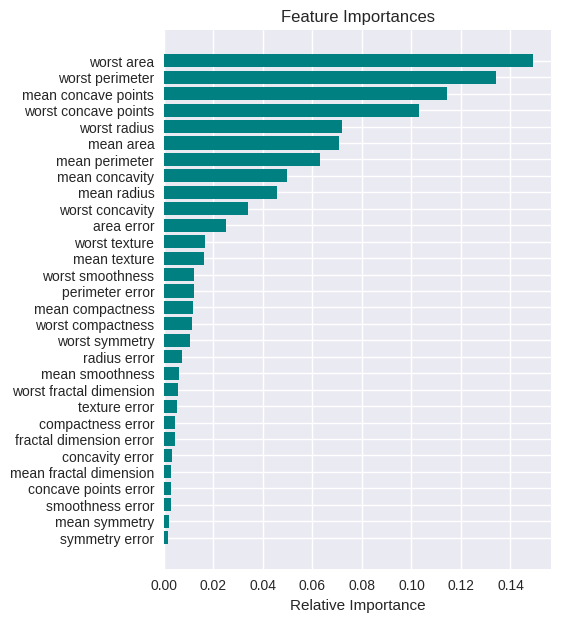

In [ ]:
#Finding feature importances.
features = df.drop('label', axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(5,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()




Text(0.5, 0, 'Relative Importance')

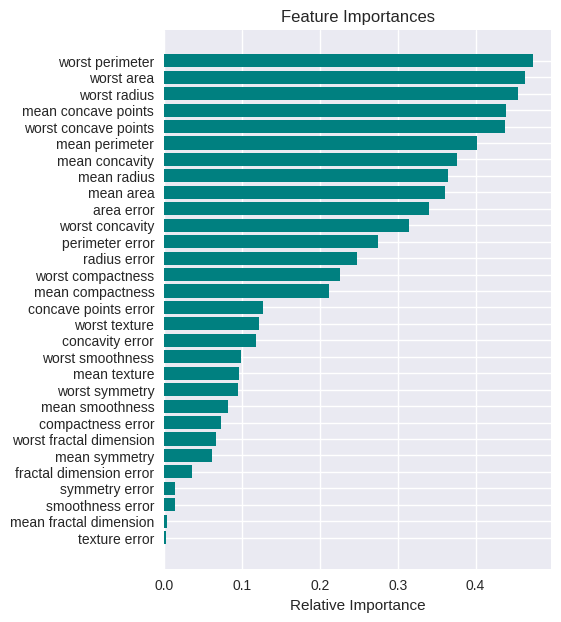

In [ ]:
#Finding feature importances
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(X,Y)
plt.figure(figsize=(5,7))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

# ***Splitting and fitting with selected features***

In [ ]:
newdf = df.loc[0:, ['mean concavity','mean concave points', 'area error', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points', 'label']]
newdf

,mean concavity,mean concave points,area error,worst radius,worst perimeter,worst area,worst concave points,label
0,0.30010,0.14710,153.40,25.380,184.60,2019.0,0.2654,0
1,0.08690,0.07017,74.08,24.990,158.80,1956.0,0.1860,0
2,0.19740,0.12790,94.03,23.570,152.50,1709.0,0.2430,0
3,0.24140,0.10520,27.23,14.910,98.87,567.7,0.2575,0
4,0.19800,0.10430,94.44,22.540,152.20,1575.0,0.1625,0
...,...,...,...,...,...,...,...,...
564,0.24390,0.13890,158.70,25.450,166.10,2027.0,0.2216,0
565,0.14400,0.09791,99.04,23.690,155.00,1731.0,0.1628,0
566,0.09251,0.05302,48.55,18.980,126.70,1124.0,0.1418,0
567,0.35140,0.15200,86.22,25.740,184.60,1821.0,0.2650,0


In [ ]:
newX = newdf.drop(columns ='label', axis=1)
newY = newdf['label']

# **Logistic Regression**

In [ ]:
#Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(newX, newY, test_size=0.2, random_state=2)
print(newdf.shape,x_train.shape,x_test.shape)

(569, 8) (455, 7) (114, 7)


In [ ]:
#Fitting the dataset into Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
x_test_predictionlr = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_predictionlr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Acccuracy on training data or known data.
print('Accuracy on training data = ', training_data_accuracy*100, "%")
#Acccuracy on testing data or unknown data.
print('Accuracy on testing data = ', test_data_accuracy*100, "%")

Accuracy on training data =  92.74725274725274 %
Accuracy on testing data =  91.22807017543859 %


# **RandomForestClassifier**

In [ ]:
#Fitting the dataset into Random Forest Classifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
x_train_prediction = model.predict(x_train)
x_test_prediction = model.predict(x_test)
train_data_accuracy2 = accuracy_score(y_train, x_train_prediction)
test_data_accuracy2 = accuracy_score(y_test, x_test_prediction)


In [ ]:
#Acccuracy on training data or known data.
print('Accuracy on training data = ', train_data_accuracy2*100, "%")
#Acccuracy on testing data or unknown data.
print('Accuracy on testing data = ', test_data_accuracy2*100, "%")

Accuracy on training data =  100.0 %
Accuracy on testing data =  93.85964912280701 %


#**K-Nearest Neighbors**#

In [ ]:
#Fitting the dataset into K-Nearest Neighbours
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_train, y_train)
y_predtrain2 = knn2.predict(x_train)
y_pred2 = knn2.predict(x_test)

In [ ]:
#Acccuracy on training data or known data.
print(f'Accuracy on training data = {accuracy_score(y_predtrain2,y_train)*100}%')
#Acccuracy on testing data or unknown data.
print(f'Accuracy on test data = {accuracy_score(y_pred2,y_test)*100}%')

Accuracy on training data = 92.74725274725274%
Accuracy on test data = 89.47368421052632%


# **Decision Tree Classification**

In [ ]:
#Fitting the dataset into Decision Tree Classification
Dtree = DecisionTreeClassifier()
Dtree.fit(x_train, y_train)
ypretrain = Dtree.predict(x_train)
y_pretest = Dtree.predict(x_test)

In [ ]:
#Acccuracy on training data or known data.
print(f'Accuracy on training data = {accuracy_score(ypretrain,y_train)*100}%')
#Acccuracy on testing data or unknown data.
print(f'Accuracy on test data = {accuracy_score(y_pretest,y_test)*100}%')

Accuracy on training data = 100.0%
Accuracy on test data = 92.10526315789474%


In [ ]:
final_data=pd.DataFrame({'Models':['LR','RFC','KNN','DTC'],
             'ACC':[accuracy_score(y_test, x_test_predictionlr)*100,
                   accuracy_score(y_test, x_test_prediction)*100,
                    accuracy_score(y_pred2,y_test)*100,
                    accuracy_score(y_pretest,y_test)*100]})
final_data

,Models,ACC
0,LR,91.228070
1,RFC,93.859649
2,KNN,89.473684
3,DTC,92.105263


# **K Fold Cross Validation**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#Cross Validation of the models
Model1 = LogisticRegression()
Model2 = RandomForestClassifier()
Model3 = KNeighborsClassifier(n_neighbors=5)
Model4 = DecisionTreeClassifier()
kfold_validation=KFold(10)
results = cross_val_score(Model1,newX, newY, cv=kfold_validation)
results2 = cross_val_score(Model2,newX, newY, cv=kfold_validation)
results3 = cross_val_score(Model3,newX, newY, cv=kfold_validation)
results4 = cross_val_score(Model4,newX, newY, cv=kfold_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
#Cross Validation result of Logistic Regression
print("The results of Logistic regression are :")
print(results*100)
#Cross Validation result of Random Forest Classifier
print("The results of Random Forest Classifier are :")
print(results2*100)
#Cross Validation result of K-Nearest Neighbor
print("The results of K-Nearest Neighborr are :")
print(results3*100)
#Cross Validation result of Decision Tree Classifier
print("The results of Decision Tree Classifier are :")
print(results4*100)
print("The mean results are :")
print("Cross Validated accuracy of Logistic Regression = ",np.mean(results)*100,"%")
print("Cross Validated accuracy of Random Forest Classifier = ",np.mean(results2)*100,"%")
print("Cross Validated accuracy of K-Nearest Neighbor = ",np.mean(results3)*100,"%")
print("Cross Validated accuracy of Decision Tree Classifier = ",np.mean(results4)*100,"%")

The results of Logistic regression are :
[80.70175439 87.71929825 91.22807018 89.47368421 96.49122807 94.73684211
 92.98245614 96.49122807 89.47368421 96.42857143]
The results of Random Forest Classifier are :
[ 91.22807018  89.47368421  89.47368421  96.49122807 100.
  96.49122807  96.49122807  94.73684211  96.49122807  98.21428571]
The results of K-Nearest Neighborr are :
[78.94736842 89.47368421 85.96491228 87.71929825 94.73684211 94.73684211
 92.98245614 92.98245614 87.71929825 94.64285714]
The results of Decision Tree Classifier are :
[91.22807018 89.47368421 89.47368421 92.98245614 94.73684211 96.49122807
 92.98245614 92.98245614 91.22807018 96.42857143]
The mean results are :
Cross Validated accuracy of Logistic Regression =  91.57268170426065 %
Cross Validated accuracy of Random Forest Classifier =  94.9091478696742 %
Cross Validated accuracy of K-Nearest Neighbor =  89.9906015037594 %
Cross Validated accuracy of Decision Tree Classifier =  92.80075187969923 %


# **Plotting the count of malignant and benign cases in respect to values of the features.**

<Axes: xlabel='worst concave points', ylabel='Count'>

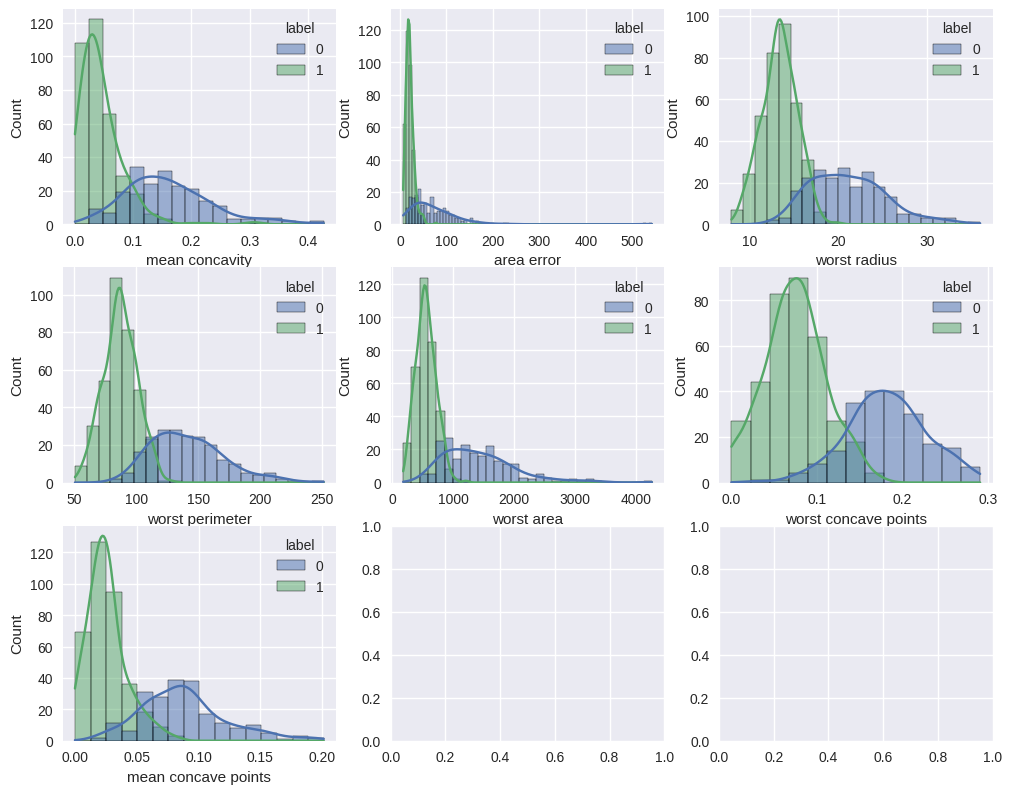

In [ ]:
plt.rcParams["figure.figsize"] = [12.00, 9.50]
f, axes = plt.subplots(3, 3)
sns.histplot(data=df, x="mean concavity", hue="label", kde=True, color="skyblue",ax=axes[0,0])
sns.histplot(data=df, x="mean concave points", hue="label", kde=True, color="skyblue",ax=axes[2,0])
sns.histplot(data=df, x="area error", hue="label", kde=True, color="skyblue",ax=axes[0,1])
sns.histplot(data=df, x="worst radius", hue="label", kde=True, color="skyblue",ax=axes[0,2])
sns.histplot(data=df, x="worst perimeter", hue="label", kde=True, color="skyblue",ax=axes[1,0])
sns.histplot(data=df, x="worst area", hue="label", kde=True, color="skyblue",ax=axes[1,1])
sns.histplot(data=df, x="worst concave points", hue="label", kde=True, color="skyblue",ax=axes[1,2])

<Axes: xlabel='worst concave points', ylabel='Count'>

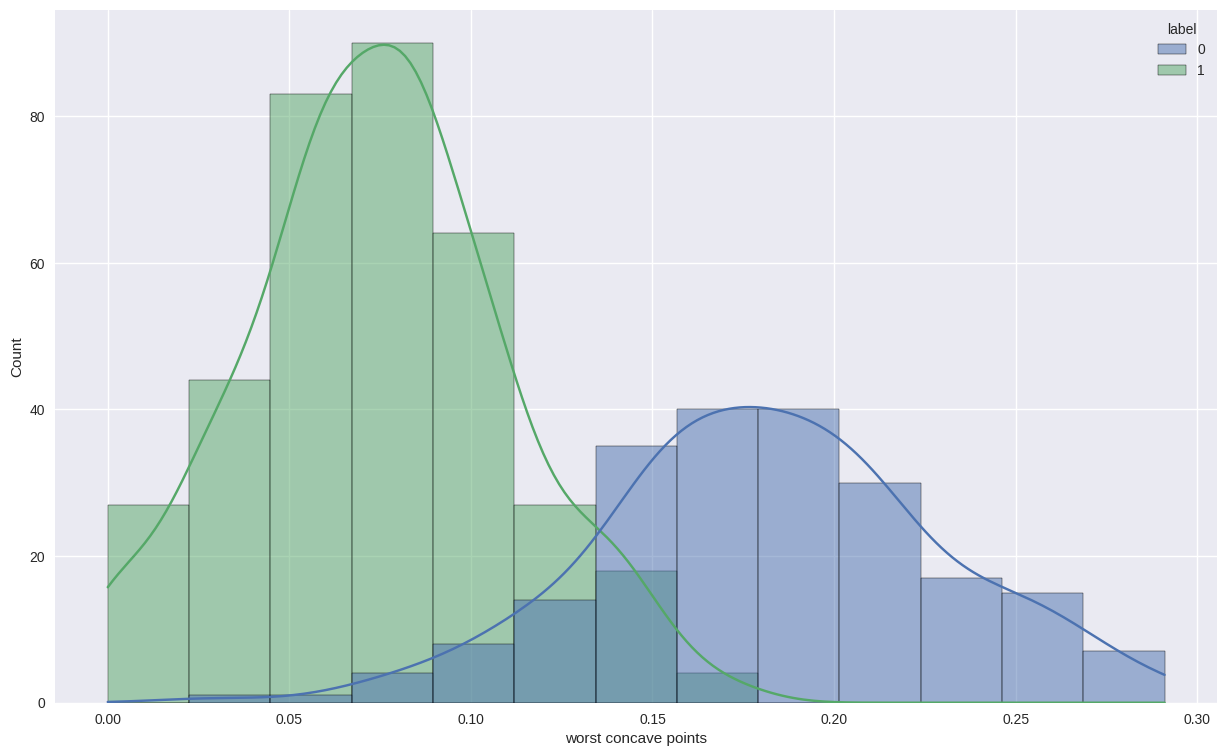

In [ ]:
plt.figure(figsize=(15,9))
sns.histplot(data=df, x="worst concave points", hue="label", kde=True, color="skyblue",)

# **Taking overlapping Values**

In [ ]:
odf = newdf[(newdf["mean concavity"] > 0.020000) & (newdf["mean concavity"] < 0.15000) & (newdf["mean concave points"] > 0.02000) & (newdf["mean concave points"] < 0.08500) & (newdf["area error"] > 20) & (newdf["area error"] < 75) & (newdf["worst radius"] >= 12.5) & (newdf["worst radius"] <= 20) & (newdf["worst perimeter"] > 75) & (newdf["worst perimeter"] < 135) & (newdf["worst area"] > 490) & (newdf["worst area"] < 1250) & (newdf["worst concave points"] > 0.023) & (newdf["worst concave points"] < 0.175)]
odf

,mean concavity,mean concave points,area error,worst radius,worst perimeter,worst area,worst concave points,label
7,0.09366,0.05985,50.96,17.06,110.60,897.0,0.15560,0
10,0.03299,0.03323,40.51,19.19,123.80,1150.0,0.09975,0
13,0.09938,0.05364,36.58,16.84,112.00,876.5,0.11190,0
16,0.07395,0.05259,45.40,19.07,123.40,1138.0,0.16090,0
19,0.06664,0.04781,23.56,15.11,99.70,711.2,0.12880,1
...,...,...,...,...,...,...,...,...
542,0.04105,0.03027,27.41,16.51,107.40,826.4,0.10950,1
544,0.03688,0.02369,23.12,15.05,99.17,688.6,0.06845,1
545,0.02974,0.02443,31.24,15.35,97.58,729.8,0.07174,1
560,0.04462,0.04304,29.84,15.30,100.20,706.7,0.10480,1


In [ ]:
X1_test = odf.drop(columns ='label', axis=1)
Y1_test = odf['label']
X1_test
Y1_test

7      0
10     0
13     0
16     0
19     1
      ..
542    1
544    1
545    1
560    1
566    0
Name: label, Length: 130, dtype: int64

In [ ]:
print(newdf.shape,x_train.shape,X1_test.shape)

(569, 8) (455, 7) (130, 7)


# **Logistic Regression**

In [ ]:
#Fitting the dataset into Logistic Regression
model1 = LogisticRegression()
model1.fit(x_train, y_train)
y1_test_prediction = model1.predict(X1_test)
test_data_accuracy = accuracy_score(y1_test_prediction, Y1_test)
print('Accuracy on testing data = ', test_data_accuracy*100,"%")

Accuracy on testing data =  80.76923076923077 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Random Forest Classifier**

In [ ]:
model2 = RandomForestClassifier()
model2.fit(x_train, y_train)
y2_test_prediction   = model2.predict(X1_test)
test_data_accuracy = accuracy_score(Y1_test, y2_test_prediction)
print('Accuracy on testing data = ', test_data_accuracy*100, "%")

Accuracy on testing data =  96.92307692307692 %


# **K-Nearest Neighbours**

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train, y_train)
y_pred3 = knn3.predict(X1_test)
print(f'accuracy on testing data = {accuracy_score(y_pred3,Y1_test)*100}%')

accuracy on testing data = 84.61538461538461%


# **Decision Tree Classifier**

In [ ]:
Dtree3 = DecisionTreeClassifier()
Dtree3.fit(x_train, y_train)
Y1_test_prediction = Dtree3.predict(X1_test)
print(f'Accuracy on testing data = {accuracy_score(Y1_test_prediction,Y1_test)*100}%')

Accuracy on testing data = 95.38461538461539%


#**ROC Curve and Precision**

In [ ]:
#LR
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)
#rfc
model3 = RandomForestClassifier()
#DTC
model4 = DecisionTreeClassifier()

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)
model4.fit(x_train, y_train)
# predict probabilities
pred_prob1 = model1.predict_proba(X1_test)
pred_prob2 = model2.predict_proba(X1_test)
pred_prob3 = model3.predict_proba(X1_test)
pred_prob4 = model4.predict_proba(X1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y1_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y1_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(Y1_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(Y1_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y1_test))]
p_fpr, p_tpr, _ = roc_curve(Y1_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(Y1_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(Y1_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(Y1_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(Y1_test, pred_prob4[:,1])

print("AUC score of Logistic Regression out of 100 is ",auc_score1*100)
print("AUC score of KNN out of 100 is ",auc_score2*100)
print("AUC score of Random Forest Classifier out of 100 is ",auc_score3*100)
print("AUC score of Decision Tree Classifier out of 100 is ",auc_score4*100)

AUC score of Logistic Regression out of 100 is  89.7883295194508
AUC score of KNN out of 100 is  89.11613272311214
AUC score of Random Forest Classifier out of 100 is  95.83810068649885
AUC score of Decision Tree Classifier out of 100 is  95.96681922196795


<ipython-input-328-c76798e9b4da>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


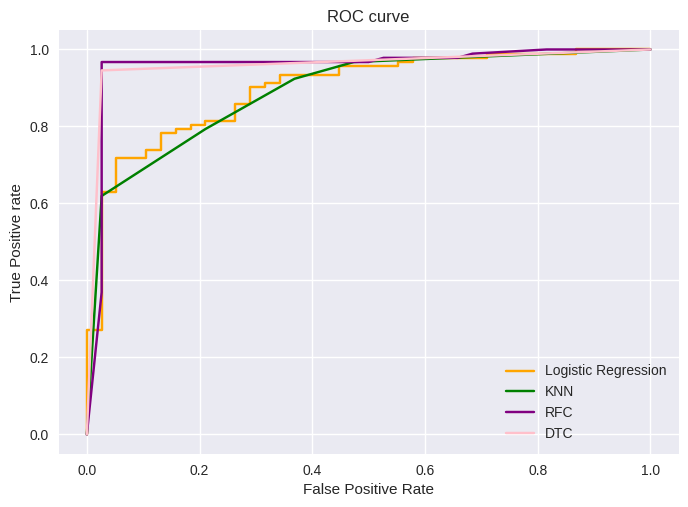

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='-',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='-',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='-',color='purple', label='RFC')
plt.plot(fpr4, tpr4, linestyle='-',color='pink', label='DTC')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
final_data=pd.DataFrame({'Models':['LR','RFC','KNN','DTC'],
             'ACC':[accuracy_score(y1_test_prediction, Y1_test)*100,
                   accuracy_score(y2_test_prediction, Y1_test)*100,
                    accuracy_score(y_pred3,Y1_test)*100,
                    accuracy_score(Y1_test_prediction, Y1_test)*100]})
final_data

,Models,ACC
0,LR,80.769231
1,RFC,96.923077
2,KNN,84.615385
3,DTC,95.384615


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print('classification report for LR: \n',classification_report(Y1_test,y1_test_prediction))
print('confusion matrix for LR: \n',confusion_matrix(Y1_test,y1_test_prediction))

classification report for LR: 
               precision    recall  f1-score   support

           0       0.64      0.79      0.71        38
           1       0.90      0.82      0.86        92

    accuracy                           0.81       130
   macro avg       0.77      0.80      0.78       130
weighted avg       0.83      0.81      0.81       130

confusion matrix for LR: 
 [[30  8]
 [17 75]]


In [ ]:
print('classification report for RFC: \n',classification_report(Y1_test,y2_test_prediction))
print('confusion matrix for RFC: \n',confusion_matrix(Y1_test,y2_test_prediction))

classification report for RFC: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.99      0.97      0.98        92

    accuracy                           0.97       130
   macro avg       0.96      0.97      0.96       130
weighted avg       0.97      0.97      0.97       130

confusion matrix for RFC: 
 [[37  1]
 [ 3 89]]


In [ ]:
print('classification report for KNN: \n',classification_report(Y1_test,y_pred3))
print('confusion matrix for KNN: \n',confusion_matrix(Y1_test,y_pred3))

classification report for KNN: 
               precision    recall  f1-score   support

           0       0.74      0.74      0.74        38
           1       0.89      0.89      0.89        92

    accuracy                           0.85       130
   macro avg       0.81      0.81      0.81       130
weighted avg       0.85      0.85      0.85       130

confusion matrix for KNN: 
 [[28 10]
 [10 82]]


In [ ]:
print('classification report for DTC: \n',classification_report(Y1_test, Y1_test_prediction))
print('confusion matrix for DTC: \n',confusion_matrix(Y1_test, Y1_test_prediction))

classification report for DTC: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.93        38
           1       0.99      0.95      0.97        92

    accuracy                           0.95       130
   macro avg       0.93      0.96      0.95       130
weighted avg       0.96      0.95      0.95       130

confusion matrix for DTC: 
 [[37  1]
 [ 5 87]]


# **Leave One Out Cross Validation**

In [ ]:
#Doing LOOC Validation on Random Forest Classifier & Decision Tree Classifier
from sklearn.model_selection import LeaveOneOut
CheckModel1 = RandomForestClassifier()
CheckModel2 = DecisionTreeClassifier()
leave_validation=LeaveOneOut()
resultsrf = cross_val_score(CheckModel1,X1_test, Y1_test, cv=leave_validation)
resultsdt = cross_val_score(CheckModel2,X1_test, Y1_test, cv=leave_validation)

print("The cross validated accuracy of Random forest classifier",np.mean(resultsrf)*100,"%")
print("The cross validated accuracy of Decision Tree Classifer",np.mean(resultsdt)*100,"%")

The cross validated accuracy of Random forest classifier 84.61538461538461 %
The cross validated accuracy of Decision Tree Classifer 80.76923076923077 %


# **Giving Manual Input**

In [ ]:
#Giving a new data to predict whether it is malugnant or benign

input_data = (0.06664,0.04781,23.56,15.11,99.70,711.2,0.12880)
input_data_as_numpy = np.asarray(input_data)
reshaped_input_data = input_data_as_numpy.reshape(1, -1)

prediction = model1.predict(reshaped_input_data)


if(prediction[0]==0):
    print("The patient's cancer is Malignant")
elif (prediction[0]==1):
    print("The patient's cancer is Benign")
else:
  print("error!!")

The patient's cancer is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
